# 파이썬 시각화

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### 시각화 구성도

- figure
- Axes
- Axis

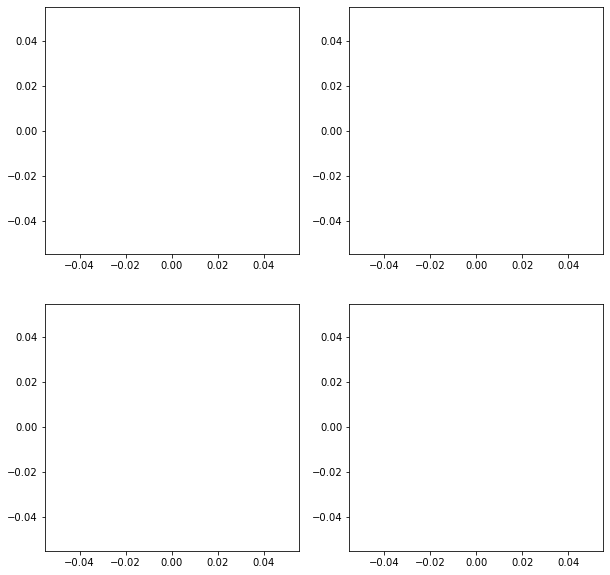

In [4]:
fig , ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax[0][0].plot()
ax[0][1].plot()
ax[1][0].plot()
ax[1][1].plot()
plt.show()

Text(0.5, 1.05, 'Figure Title')

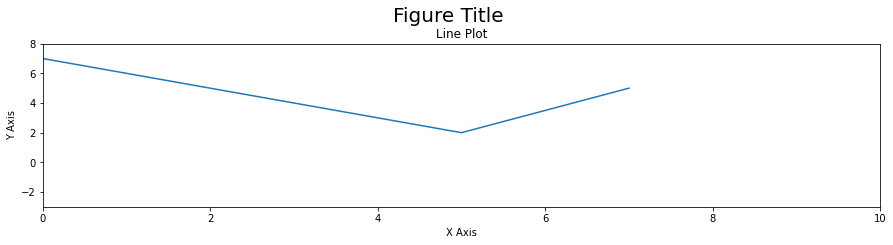

In [5]:
x = [-3,5,7]
y = [10,2,5]

plt.figure(figsize=(15,3))
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(-3,8)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Line Plot")
plt.suptitle("Figure Title", size=20, y=1.05)

- pandas에서 간단한 시각화 실행

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(index=["Atiya", "Abbas", "Cornelia","StepHanie","Monte"],
                 data ={"Apples":[20,10,40,20,50],
                       "Oranges":[35,40,25,19,33]})

In [8]:
color = ["1.2",".7"]

In [9]:
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
StepHanie,20,19
Monte,50,33


- DataFrame의 기본 메서드인 plot을 이용해 Bar / KDE / Scatter 형태의 시각화

<AxesSubplot:>

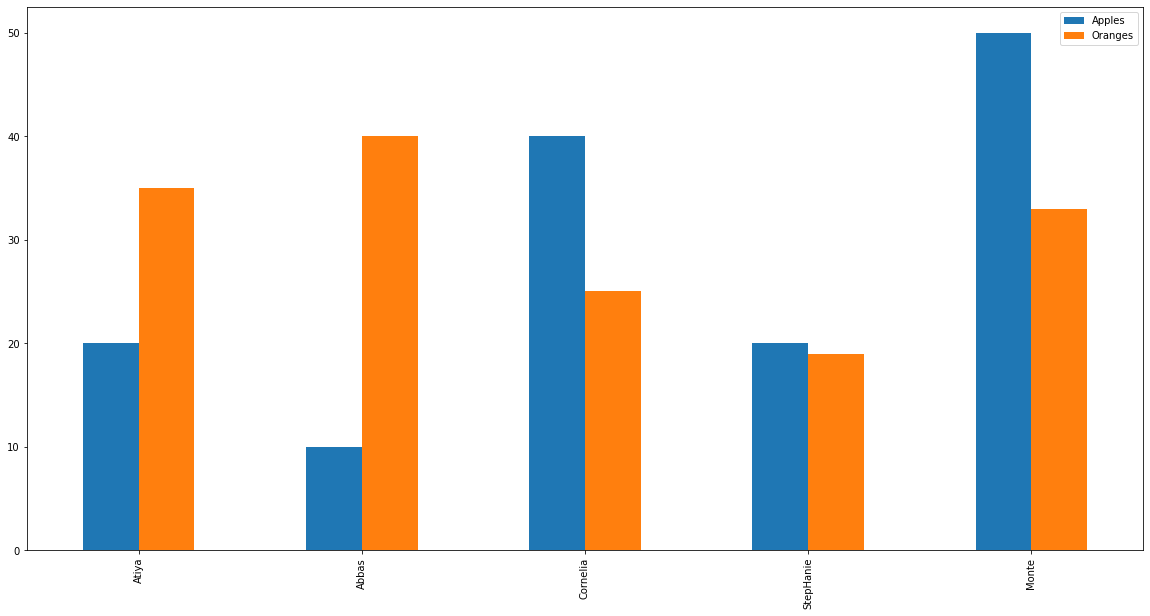

In [10]:
df.plot(kind="bar",figsize=(20,10))

<AxesSubplot:ylabel='Density'>

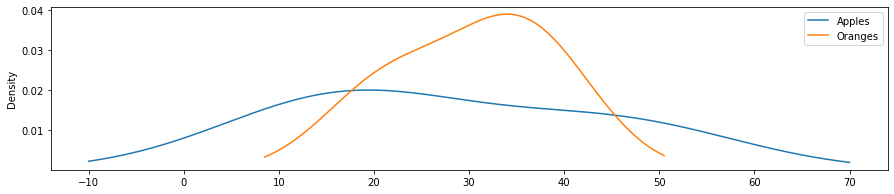

In [11]:
df.plot(kind="kde", figsize=(15,3))

<AxesSubplot:xlabel='Apples', ylabel='Oranges'>

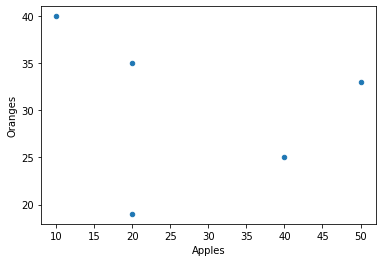

In [12]:
df.plot(kind="scatter",x ="Apples",y="Oranges")

- 단일 변수에 대해서 시각화 사용

In [ ]:
import warning


C:\Users\user\anaconda3\envs\nam1\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Bar Plot'}>

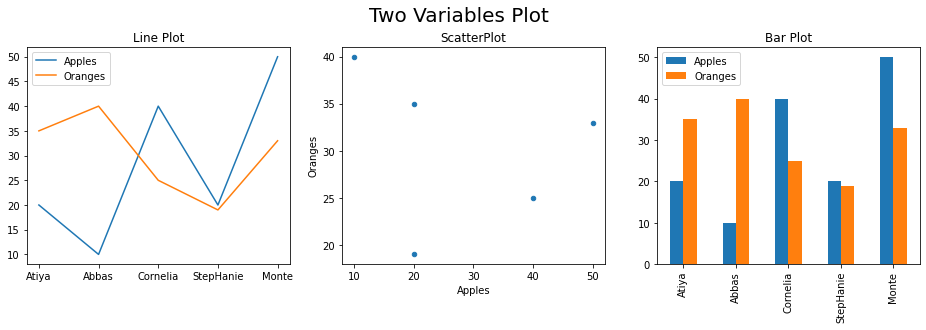

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
fig.suptitle("Two Variables Plot", size=20, y=1.02)
df.plot(kind="line", ax=ax1, title="Line Plot")
df.plot(x="Apples", y="Oranges", kind="scatter", ax=ax2, title="ScatterPlot")
df.plot(kind="bar", ax=ax3, title="Bar Plot")

- 두개 이상의 변수에 대해서 시각화 사용

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'BoxPlot'}>

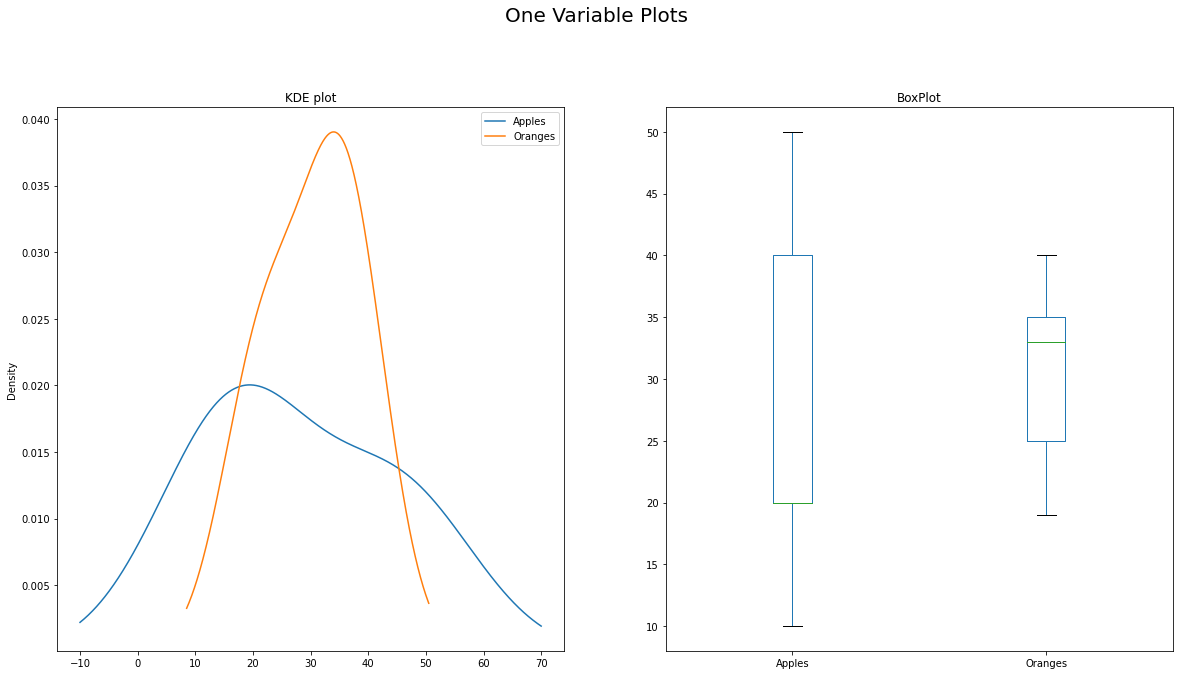

In [14]:
fig,(ax1 ,ax2) = plt.subplots(nrows=1 , ncols=2 , figsize=(20,10))
fig.suptitle("One Variable Plots",size=20,y=1.02)
df.plot(kind="kde", ax = ax1, title ="KDE plot")
df.plot(kind="box", ax= ax2 , title="BoxPlot")

## 특정 데이터 셋을 이용해 시각화

In [17]:
movie = pd.read_csv("./data/movie.csv")

- 각 연도별 영화 예산의 중앙값

In [18]:
med_budget = movie.groupby(["title_year"])["budget"].agg(["median"])

In [19]:
med_budget

,median
title_year,
1916.0,385907.0
1920.0,100000.0
1925.0,245000.0
1927.0,6000000.0
1929.0,379000.0
...,...
2012.0,17000000.0
2013.0,20000000.0
2014.0,15000000.0


In [20]:
med_budget_roll = med_budget.rolling(5,min_periods=1).mean()

In [21]:
med_budget_roll

,median
title_year,
1916.0,3.859070e+05
1920.0,2.429535e+05
1925.0,2.436357e+05
1927.0,1.682727e+06
1929.0,1.421981e+06
...,...
2012.0,2.089300e+07
2013.0,1.989300e+07
2014.0,1.910000e+07


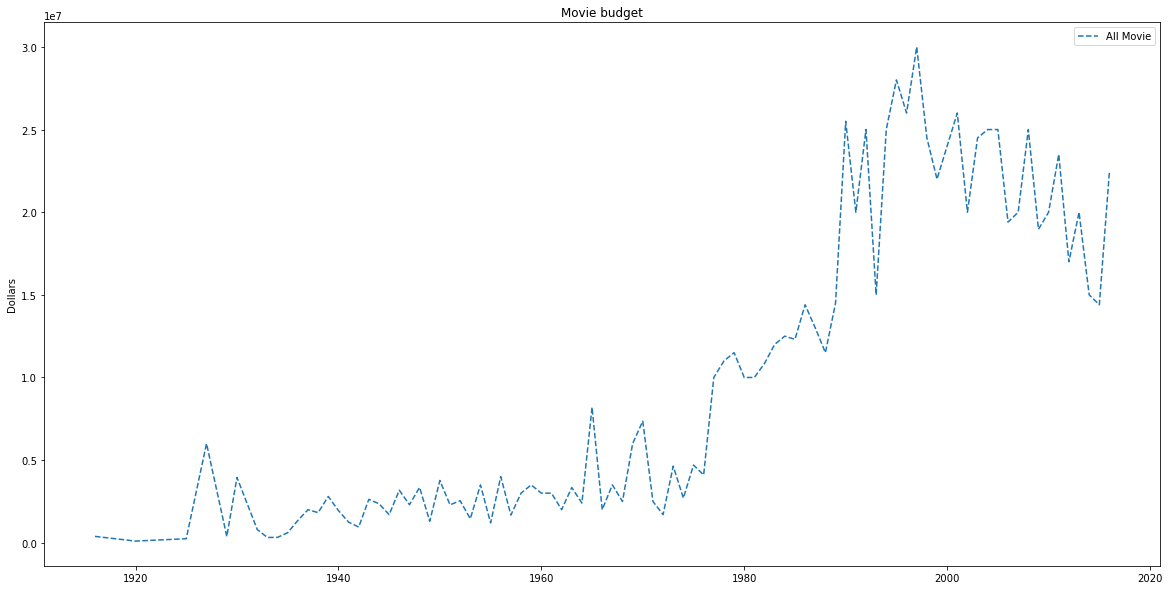

In [24]:
fig , ax = plt.subplots(figsize=(20,10))
ax.plot(med_budget.index , med_budget.values , linestyle="--",label="All Movie")
ax.set_title("Movie budget")
ax.set_ylabel("Dollars")
plt.legend()
plt.show()

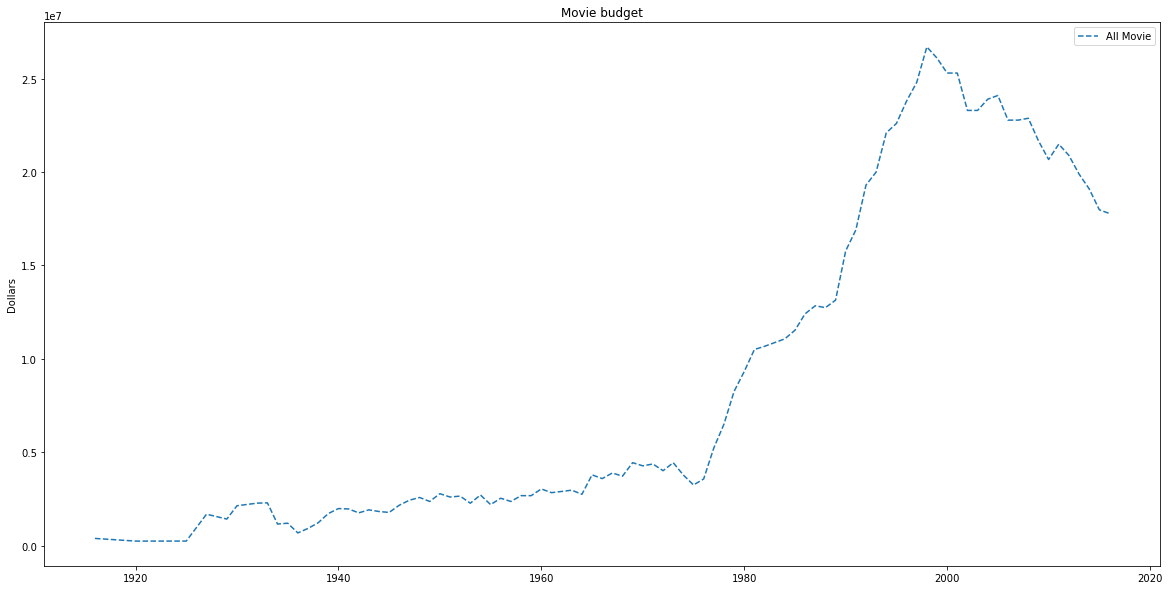

In [23]:
fig , ax = plt.subplots(figsize=(20,10))
ax.plot(med_budget_roll.index , med_budget_roll.values , linestyle="--",label="All Movie")
ax.set_title("Movie budget")
ax.set_ylabel("Dollars")
plt.legend()
plt.show()

- 같은 그림 내에 해당 년도에 만든 영화 건수를 추가

In [25]:
movie_groupby = movie.groupby(["title_year"])["budget"].agg(["median","count"])

In [26]:
movie_groupby

,median,count
title_year,,
1916.0,385907.0,1
1920.0,100000.0,1
1925.0,245000.0,1
1927.0,6000000.0,1
1929.0,379000.0,1
...,...,...
2012.0,17000000.0,191
2013.0,20000000.0,208
2014.0,15000000.0,221


In [27]:
movie_budget_roll = movie_groupby['median'].rolling(window=5).mean()

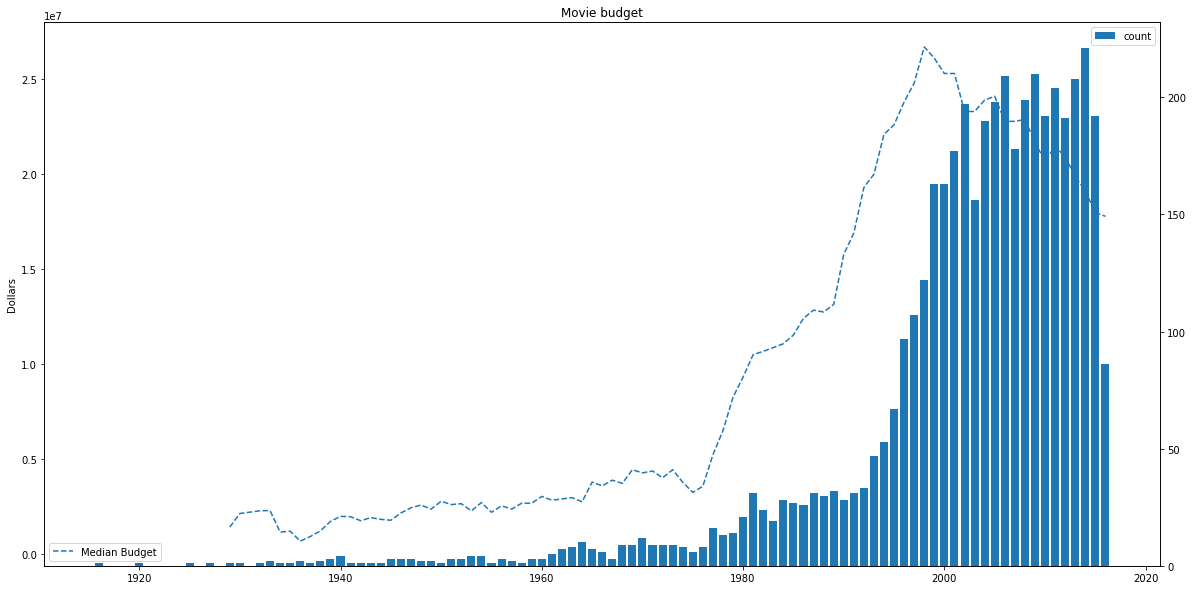

In [28]:
fig ,  ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.plot(movie_budget_roll.index, movie_budget_roll.values , 
         linestyle="--",label="Median Budget")
ax2.bar(movie_groupby.index , movie_groupby["count"] , label="count")


ax1.set_title("Movie budget")
ax1.set_ylabel("Dollars")
ax1.legend(loc="lower left")
ax2.legend()
plt.legend()
plt.show()


In [29]:
import seaborn as sns

In [30]:
employee = pd.read_csv("./data/employee.csv")

In [31]:
employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [32]:
employee["HIRE_DATE"] = pd.to_datetime(employee["HIRE_DATE"])
employee["JOB_DATE"] = pd.to_datetime(employee["JOB_DATE"])

In [ ]:
sns.countplot(y="DEPARTMENT",data=employee)

In [ ]:
employee["DEPARTMENT"].value_counts().plot(kind="barh")

In [ ]:
fig ,ax = plt.subplots(nrows=1 , ncols=2 , figsize=(20,10))
sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee,  ax = ax[0] )
sns.barplot(x="RACE", y="BASE_SALARY",data=employee,ax=ax[1])
plt.show()

In [ ]:
ax = sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee )
ax.figure.set_size_inches(16,4)

In [ ]:
ax = sns.barplot(x="RACE", y="BASE_SALARY",data=employee)
ax.figure.set_size_inches(16,4)

In [ ]:
avg_sal = employee.groupby("RACE", sort=False)["BASE_SALARY"].mean()
ax = avg_sal.plot(kind="bar",figsize=(16,4),width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel("MEAN")

In [ ]:
ax = sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee )
ax.figure.set_size_inches(16,4)

In [ ]:
employee.groupby(["RACE","GENDER"])["BASE_SALARY"].mean().unstack("GENDER").plot(kind="bar" ,figsize=(16,4))

In [ ]:
ax = sns.boxplot(x="GENDER" , y="BASE_SALARY", data=employee, hue="RACE")
ax.figure.set_size_inches(14,4)

In [ ]:
import pandas as pd

In [ ]:
employee["HIRE_DATE"] = pd.to_datetime(employee["HIRE_DATE"])

In [ ]:
import datetime

In [ ]:
dt = datetime.timedelta(weeks=2, days=5)

In [ ]:
dt

In [ ]:
date

In [ ]:
date - dt

In [ ]:
from dateutil.relativedelta import relativedeltaa

In [ ]:
date - relativedelta(years=3, months=3)

In [ ]:
date

In [ ]:
df_order = pd.read_excel("./data/Superstore.xls"
                         ,sheet_name="Orders", dtype="unicode")

In [ ]:
df_order["Order Date"] = pd.to_datetime(df_order["Order Date"])

In [ ]:
series_1 = df_order.drop_duplicates(subset=["Order ID"]).groupby(["Order Date"])["Order ID"].agg(["count"])

In [ ]:
series_1.plot(figsize=(20,10))

In [ ]:
series_1.resample("W").mean().plot(figsize=(20,10))

In [ ]:
series_1.rolling(window=7).mean().plot(figsize=(20,10))

In [ ]:
series_1.loc["2014"]

In [ ]:
series_1.loc["2014-01":"2014-02"]

In [ ]:
time_df = series_1.reset_index(drop=False)

In [ ]:
df_order["New Order Date"] = df_order[["Row ID","Order Date"]].apply(lambda row :row[1] +  relativedelta(hours=int(row[0])),axis=1)

In [ ]:
series_2 = df_order.drop_duplicates(subset=["Order ID"]).groupby(["New Order Date"])["Order ID"].agg(["count"])

In [ ]:
series_2

In [ ]:
series_2.between_time("2:00","5:00")

In [ ]:
series_2.at_time("2:00")

In [ ]:
import numpy as np

In [ ]:
df_order["Sales"] = df_order["Sales"].astype(np.float)
df_order["Profit"] = df_order["Profit"].astype(np.float)

In [ ]:
timeseries_df = df_order.groupby(["Order Date"]).agg({"Sales":"sum","Profit":"sum"})

In [ ]:
timeseries_df.plot(figsize=(20,10),color=["red","blue"])

In [ ]:
timeseries_df.resample("Q").mean().plot(figsize=(20,10),color=["red","blue"])

In [ ]:
series_df = series_1.reset_index(drop=False)

In [ ]:
series_df["year"] = series_df["Order Date"].dt.year
series_df["month"] = series_df["Order Date"].dt.month


In [ ]:
import seaborn as sns

In [ ]:
tmp_df = series_df.pivot_table(index="year", columns="month",values="count",aggfunc=sum)

In [ ]:
sns.heatmap(tmp_df)

In [ ]:
series_df.pivot_table(index="month",columns="year",values="count",aggfunc=sum).plot()

In [ ]:
df_movie = pd.read_csv("./data/movie.csv")

In [ ]:
pd.crosstab(df_movie["color"].notnull() , df_movie["director_name"].notnull(),normalize=False,margins=True)